In [72]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',family = 'NanumGothicCoding')

from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

In [49]:
df_raw = pd.read_csv("./data/체질검사.csv", encoding = '949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [50]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)


In [51]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data X size : {}'.format(df_train_y.shape))
print('train data X size : {}'.format(df_test_x.shape))
print('train data X size : {}'.format(df_test_y.shape))


train data X size : (176, 13)
train data X size : (176,)
train data X size : (76, 13)
train data X size : (76,)


In [52]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on trainning set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on trainning set : 1.000
Score on test set : 0.295


In [53]:
train_score = [];test_score=[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234
                                ,min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [54]:
df_score_leaf.head()

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000000,0.295274
1,2,0.970285,0.373763
2,3,0.927517,0.444953
3,4,0.901643,0.447253
4,5,0.868127,0.450753


In [55]:
df_score_leaf.round(3).head(10)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.295
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


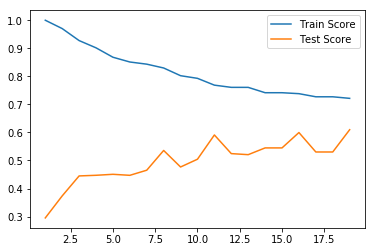

In [56]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.legend()

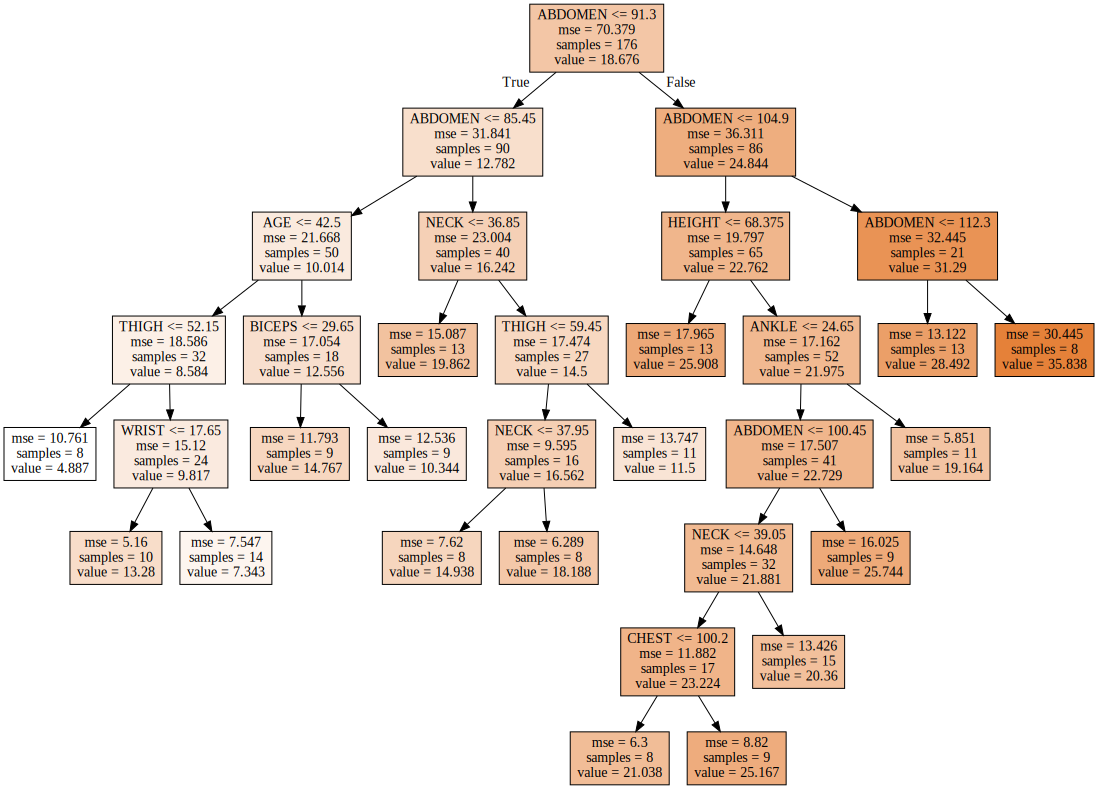

In [57]:
v_feature_names = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_leaf.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

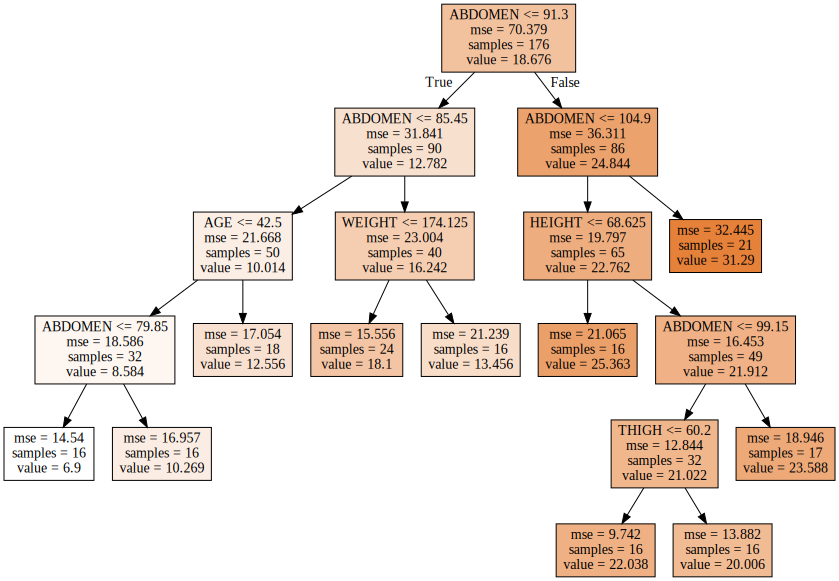

In [58]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_leaf.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [59]:
train_score = [];test_score=[]
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8
                                ,min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


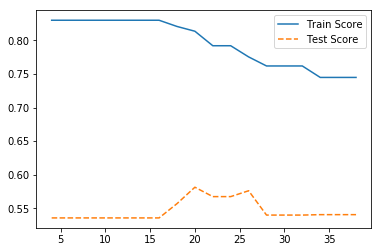

In [60]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

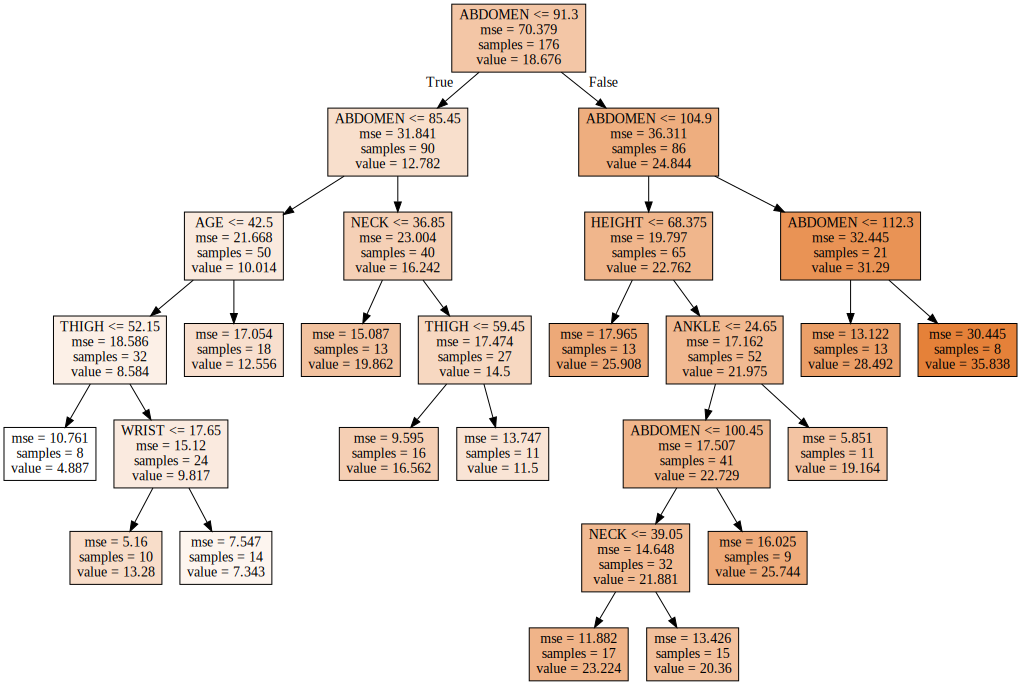

In [61]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=8, min_samples_split = 20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_split.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

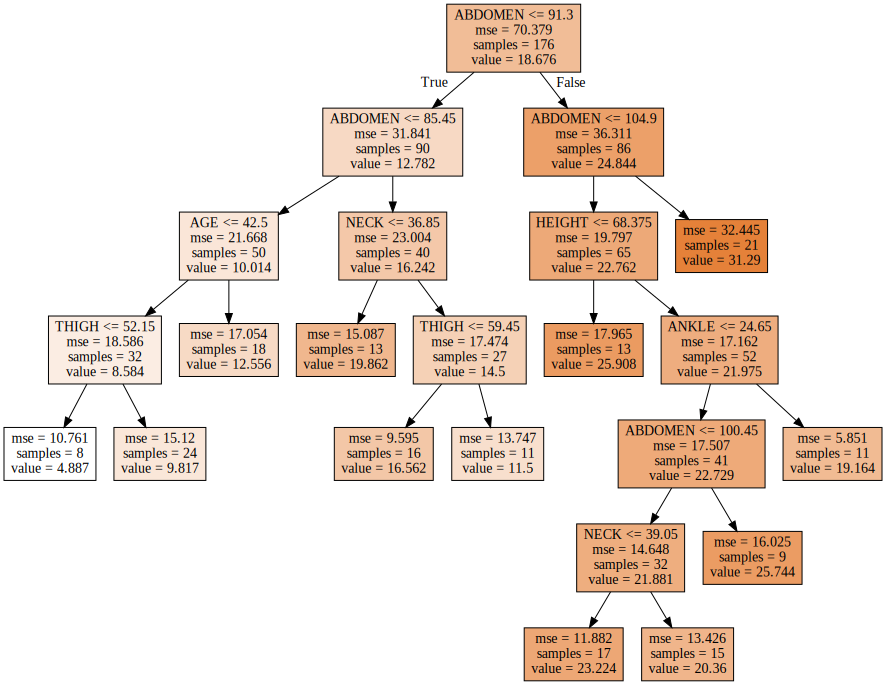

In [62]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=8, min_samples_split = 26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_split.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [63]:
train_score = [];test_score=[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8
                                ,min_samples_split = 20, max_depth = v_max_depth)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesLeaf'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
# df_score_depth.round(3)

In [64]:
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


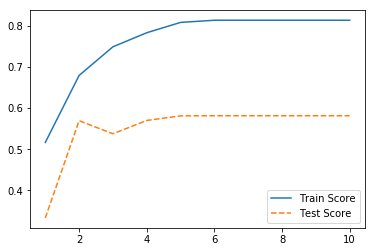

In [65]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

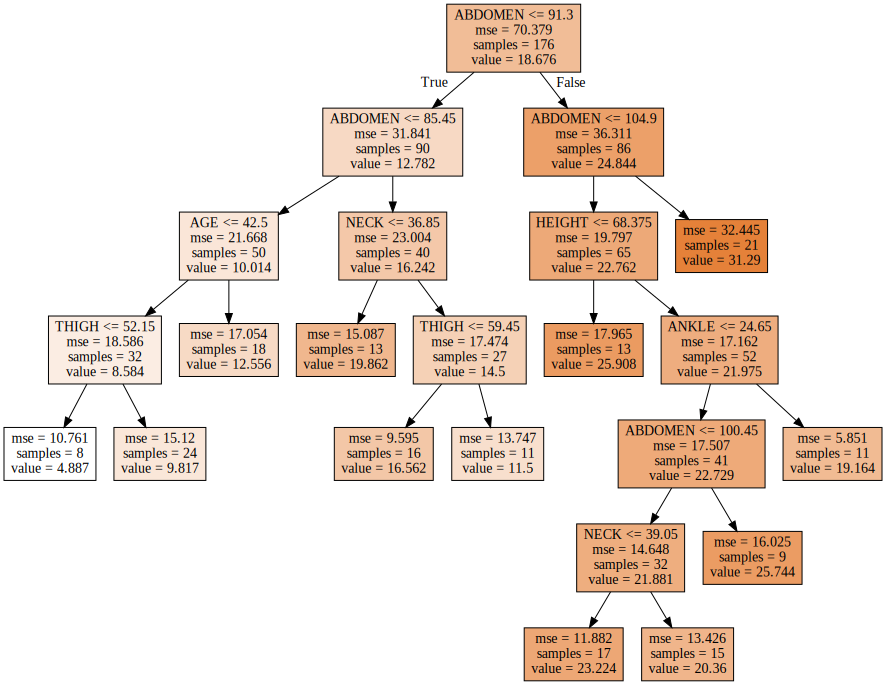

In [66]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=8, min_samples_split = 26, max_depth = 2)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = 'tree_depth.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

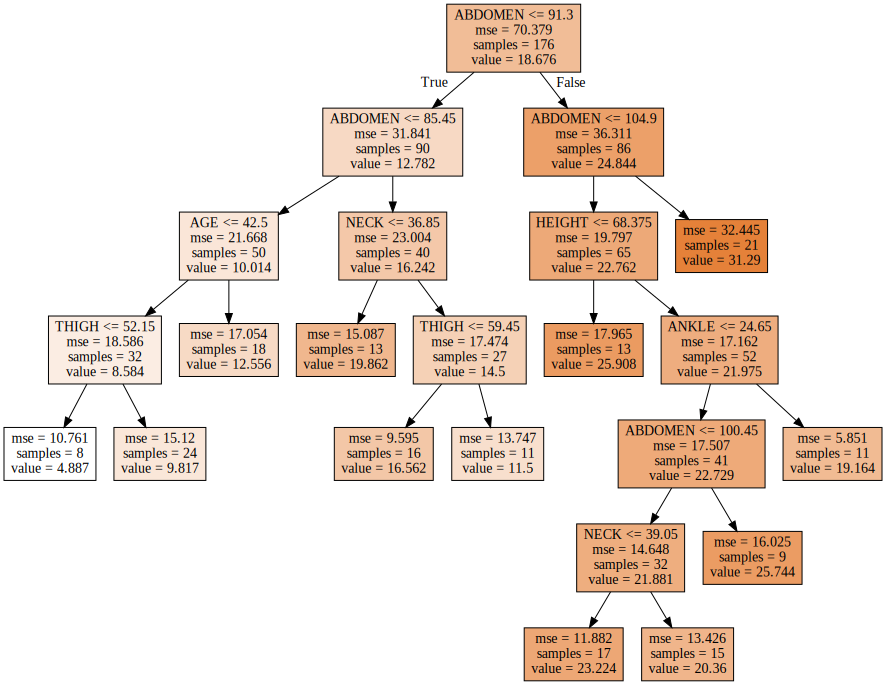

In [67]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=8, min_samples_split = 26, max_depth = 4)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = 'tree_depth.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [68]:
tree_final = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 4)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

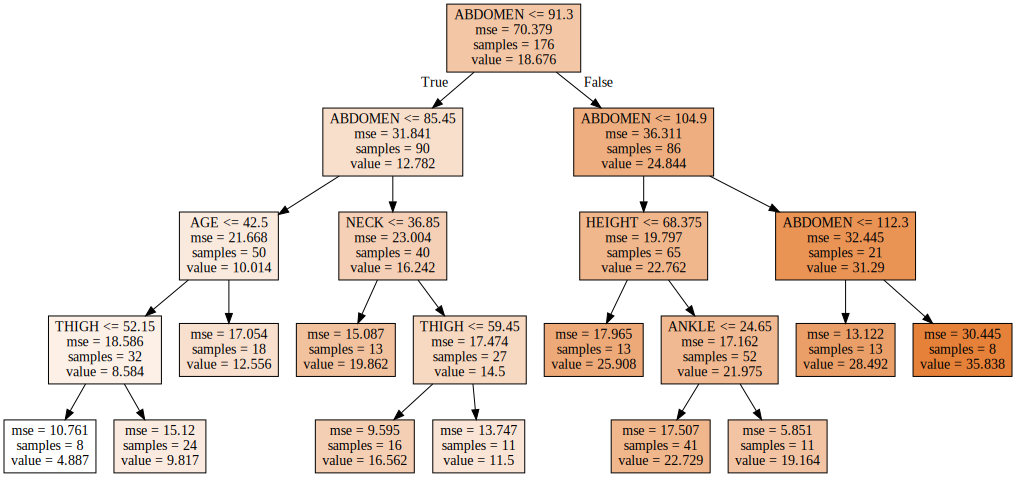

In [69]:
export_graphviz(tree_final, out_file = 'tree_final.dot', feature_names = v_feature_names, impurity = True, filled = True)

with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 4.결론도출

In [70]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_names
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)



,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

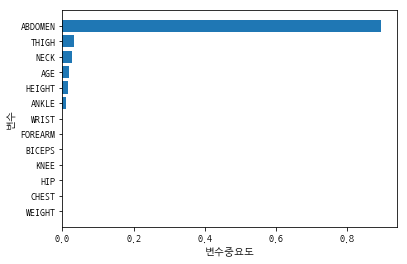

In [73]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수중요도')
plt.ylabel('변수')

In [75]:
estimator = DecisionTreeRegressor()

#구하고자 하는 parameter와 범위
param_grid = {'criterion':['mse','friedman_mse','mae'], 'max_features':['auto','sqrt','log2'],
             'max_depth':para_depth, 'min_samples_split':para_split,
             'min_samples_leaf':para_leaf}

#설명력이 높은 최적 parameter찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'r2', n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n {}'.format(grid_dt.best_estimator_))
print('\n nbest parameter : \n {}'.format(grid_dt.best_params_))
print('\n best score: \n {}'.format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
 DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

 nbest parameter : 
 {'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 4}

 best score: 
 0.636


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
